In [1]:
import torch 
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root="/content/drive/MyDrive/Datasets", download=True)

Extracting /content/drive/MyDrive/Datasets/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Datasets/MNIST/raw


Extracting /content/drive/MyDrive/Datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Datasets/MNIST/raw


Extracting /content/drive/MyDrive/Datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Datasets/MNIST/raw


Extracting /content/drive/MyDrive/Datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Datasets/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root = "/content/drive/MyDrive/Datasets", train = False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FE4398FD2E8>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


Label: 5


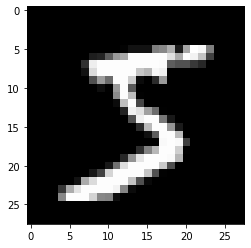

In [7]:
image , label = dataset[0]
plt.imshow(image , cmap='gray')
print("Label:",label)

Label: 3


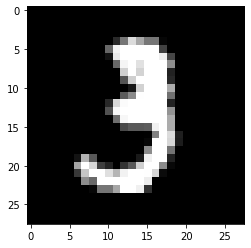

In [8]:
image , label = dataset[10]
plt.imshow(image, cmap = "gray")
print("Label:", label)

In [9]:
import torchvision.transforms as transforms

In [11]:
dataset = MNIST(root = "/content/drive/MyDrive/Datasets", train = True , transform= transforms.ToTensor())

In [12]:
img_tensor , label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[0 , 10:15 , 10:15]) 
print(torch.max(img_tensor) , torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


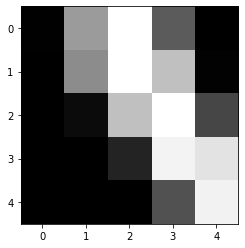

In [15]:
plt.imshow(img_tensor[0 , 10:15 , 10:15] , cmap = "gray")

## Training and Validation Dataset 

In [16]:
from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset , [50000 , 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [17]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size , shuffle = True)
val_loader = DataLoader(val_ds,batch_size)

In [18]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size , num_classes)

In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0253,  0.0067,  0.0204,  ...,  0.0122,  0.0144, -0.0270],
        [ 0.0169, -0.0088,  0.0253,  ...,  0.0005, -0.0249,  0.0151],
        [-0.0151,  0.0216, -0.0159,  ...,  0.0159, -0.0140, -0.0041],
        ...,
        [-0.0250, -0.0118, -0.0243,  ..., -0.0065, -0.0224, -0.0078],
        [ 0.0263, -0.0194,  0.0300,  ..., -0.0090,  0.0261,  0.0339],
        [ 0.0339,  0.0275,  0.0212,  ..., -0.0250, -0.0083, -0.0276]],
       requires_grad=True)

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0126,  0.0244, -0.0298,  0.0265,  0.0036,  0.0317,  0.0069,  0.0118,
        -0.0300, -0.0276], requires_grad=True)

In [21]:
for images, label in train_loader:
  print(label)
  print(images.shape)
  output = model(images)
  print(outputs.shape)
  break

tensor([5, 5, 8, 7, 6, 1, 6, 6, 9, 5, 2, 7, 0, 2, 4, 1, 1, 3, 8, 2, 4, 5, 4, 9,
        6, 4, 1, 8, 1, 7, 7, 8, 7, 4, 7, 2, 2, 0, 8, 2, 4, 6, 1, 7, 0, 5, 6, 0,
        5, 2, 5, 7, 0, 5, 3, 3, 2, 3, 3, 9, 5, 0, 0, 9, 1, 7, 2, 3, 1, 9, 8, 9,
        0, 3, 4, 6, 8, 9, 4, 3, 9, 1, 1, 1, 8, 8, 1, 8, 3, 3, 3, 5, 4, 1, 2, 3,
        9, 0, 9, 0, 4, 7, 4, 9, 3, 9, 9, 1, 2, 8, 7, 1, 3, 1, 9, 1, 4, 6, 7, 4,
        6, 7, 9, 1, 5, 5, 6, 7])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [22]:
images.shape

torch.Size([128, 1, 28, 28])

In [24]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [34]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [28]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [32]:
print(model.linear.weight.shape , model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0160,  0.0052, -0.0320,  ...,  0.0029, -0.0171, -0.0069],
         [-0.0041, -0.0244,  0.0162,  ...,  0.0209, -0.0133,  0.0303],
         [-0.0154, -0.0160,  0.0108,  ..., -0.0075, -0.0084,  0.0314],
         ...,
         [ 0.0113, -0.0304, -0.0237,  ...,  0.0175, -0.0068, -0.0007],
         [ 0.0230, -0.0056,  0.0271,  ...,  0.0032, -0.0154, -0.0317],
         [-0.0018, -0.0208,  0.0092,  ..., -0.0209,  0.0174,  0.0296]],
        requires_grad=True), Parameter containing:
 tensor([-0.0011, -0.0031, -0.0254, -0.0028, -0.0104,  0.0284, -0.0288,  0.0180,
         -0.0341,  0.0238], requires_grad=True)]

In [35]:
for images,labels in train_loader:
  print(images.shape)
  output = model(images)
  break

print("Outputs.shape:" , output.shape)
print("Sample Output: \n", output[:2].data)

torch.Size([128, 1, 28, 28])
Outputs.shape: torch.Size([128, 10])
Sample Output: 
 tensor([[-0.2266, -0.1410, -0.1962,  0.3531,  0.1656, -0.3915, -0.2488, -0.3930,
          0.0878,  0.0063],
        [-0.2954, -0.3175, -0.2157, -0.0353,  0.1566, -0.2847, -0.1711, -0.3480,
          0.1996,  0.0014]])


In [39]:
import torch.nn.functional as F

In [37]:
output[:2]

tensor([[-0.2266, -0.1410, -0.1962,  0.3531,  0.1656, -0.3915, -0.2488, -0.3930,
          0.0878,  0.0063],
        [-0.2954, -0.3175, -0.2157, -0.0353,  0.1566, -0.2847, -0.1711, -0.3480,
          0.1996,  0.0014]], grad_fn=<SliceBackward>)

In [40]:
probs = F.softmax(output , dim=1)

print("Sample Probabilities: \n ", probs[:2].data)

print("Sum:", torch.sum(probs[0]).item())

Sample Probabilities: 
  tensor([[0.0855, 0.0932, 0.0882, 0.1527, 0.1266, 0.0725, 0.0837, 0.0724, 0.1171,
         0.1080],
        [0.0833, 0.0815, 0.0902, 0.1080, 0.1309, 0.0842, 0.0943, 0.0790, 0.1366,
         0.1121]])
Sum: 1.0


In [41]:
max_probs , preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([3, 8, 0, 6, 4, 4, 4, 4, 3, 9, 2, 0, 4, 3, 6, 4, 4, 8, 6, 4, 4, 2, 9, 2,
        0, 3, 4, 0, 4, 6, 6, 4, 4, 4, 1, 0, 6, 4, 3, 4, 0, 4, 2, 8, 2, 4, 0, 4,
        0, 4, 6, 4, 0, 0, 4, 4, 3, 9, 0, 9, 3, 4, 4, 6, 3, 0, 2, 6, 4, 4, 2, 0,
        4, 4, 4, 6, 7, 6, 6, 4, 6, 3, 6, 4, 4, 4, 6, 3, 3, 6, 3, 9, 6, 3, 6, 4,
        4, 4, 4, 4, 7, 4, 0, 4, 3, 4, 4, 6, 6, 4, 6, 4, 6, 4, 3, 4, 0, 4, 3, 4,
        6, 4, 0, 4, 0, 2, 6, 6])
tensor([0.1527, 0.1366, 0.1230, 0.1510, 0.1421, 0.1592, 0.1426, 0.1563, 0.1529,
        0.1318, 0.1300, 0.1243, 0.1326, 0.1211, 0.1306, 0.1811, 0.1263, 0.1211,
        0.1273, 0.1366, 0.1259, 0.1346, 0.1235, 0.1361, 0.1261, 0.1366, 0.1388,
        0.1277, 0.1318, 0.1163, 0.1378, 0.1221, 0.1455, 0.1541, 0.1247, 0.1364,
        0.1457, 0.1307, 0.1436, 0.1299, 0.1268, 0.1821, 0.1198, 0.1304, 0.1375,
        0.1087, 0.1241, 0.1576, 0.1286, 0.1329, 0.1581, 0.1814, 0.1376, 0.1606,
        0.1234, 0.1290, 0.1201, 0.1158, 0.1353, 0.1305, 0.1190, 0.1562, 0.1893,
       

In [42]:
labels

tensor([9, 6, 3, 1, 2, 1, 9, 4, 0, 0, 5, 9, 2, 5, 5, 8, 8, 5, 3, 9, 8, 3, 0, 7,
        7, 4, 7, 3, 1, 1, 3, 7, 4, 7, 3, 8, 1, 8, 9, 9, 9, 9, 7, 9, 0, 5, 8, 2,
        9, 7, 2, 6, 9, 9, 0, 6, 0, 4, 1, 5, 3, 8, 7, 3, 4, 9, 9, 8, 7, 9, 7, 5,
        8, 9, 7, 6, 0, 1, 6, 7, 1, 5, 1, 4, 6, 6, 9, 8, 4, 2, 3, 2, 2, 5, 7, 1,
        0, 5, 8, 6, 0, 7, 4, 7, 5, 4, 5, 3, 3, 1, 1, 6, 6, 7, 6, 7, 3, 8, 0, 5,
        7, 3, 2, 2, 4, 8, 3, 5])

## Evaluation Matrix and Cross Entropy

In [43]:
output[:2]

tensor([[-0.2266, -0.1410, -0.1962,  0.3531,  0.1656, -0.3915, -0.2488, -0.3930,
          0.0878,  0.0063],
        [-0.2954, -0.3175, -0.2157, -0.0353,  0.1566, -0.2847, -0.1711, -0.3480,
          0.1996,  0.0014]], grad_fn=<SliceBackward>)

In [44]:
torch.sum(preds == labels)

tensor(9)

In [66]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [46]:
accuracy(output , labels)

tensor(0.0703)

In [47]:
probs

tensor([[0.0855, 0.0932, 0.0882,  ..., 0.0724, 0.1171, 0.1080],
        [0.0833, 0.0815, 0.0902,  ..., 0.0790, 0.1366, 0.1121],
        [0.1230, 0.1029, 0.1205,  ..., 0.1066, 0.0888, 0.0857],
        ...,
        [0.1003, 0.1015, 0.1228,  ..., 0.0761, 0.1091, 0.0922],
        [0.0921, 0.1054, 0.0979,  ..., 0.1009, 0.1068, 0.1022],
        [0.1208, 0.0912, 0.1048,  ..., 0.1051, 0.0839, 0.0833]],
       grad_fn=<SoftmaxBackward>)

In [49]:
output

tensor([[-0.2266, -0.1410, -0.1962,  ..., -0.3930,  0.0878,  0.0063],
        [-0.2954, -0.3175, -0.2157,  ..., -0.3480,  0.1996,  0.0014],
        [ 0.1607, -0.0177,  0.1402,  ...,  0.0172, -0.1647, -0.2003],
        ...,
        [-0.0156, -0.0030,  0.1876,  ..., -0.2914,  0.0692, -0.0992],
        [-0.1167,  0.0183, -0.0548,  ..., -0.0247,  0.0319, -0.0117],
        [ 0.1575, -0.1232,  0.0156,  ...,  0.0185, -0.2063, -0.2144]],
       grad_fn=<AddmmBackward>)

In [50]:
loss_fn = F.cross_entropy

In [52]:
loss = loss_fn(output , labels)
print(loss)

tensor(2.3561, grad_fn=<NllLossBackward>)


## Model Training

In [78]:
def fit(epochs , lr , model , train_loader , val_loader , opt_func = torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = []
  for epoch in range(epochs):
    # Training Phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result = evaluate(model , val_loader)
    model.epoch_end(epoch , result)
    history.append(result)

  return history


In [54]:
l1 = [1,2,3,4,5]

In [56]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [70]:
def evaluate(model, val_loader):
    output = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(output)


In [73]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self , batch):
      images , labels = batch
      out = self(images)
      loss = F.cross_entropy(out , labels)
      return loss
    
    def validation_step(self , batch):
      images , labels = batch
      out = self(images)
      loss = F.cross_entropy(out , labels)
      acc = accuracy(out , labels)
      return { "val_loss": loss , "val_acc" : acc }

    def validation_epoch_end(self, output):
        batch_losses = [x['val_loss'] for x in output]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in output]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


model = MnistModel()

In [74]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.14329509437084198, 'val_loss': 2.3298075199127197}

In [79]:
history1 = fit(5 , 0.001 , model , train_loader , val_loader)

Epoch [0], val_loss: 1.6748, val_acc: 0.7229
Epoch [1], val_loss: 1.4765, val_acc: 0.7566
Epoch [2], val_loss: 1.3268, val_acc: 0.7799
Epoch [3], val_loss: 1.2116, val_acc: 0.7966
Epoch [4], val_loss: 1.1211, val_acc: 0.8069


In [80]:
history2 = fit(5 , 0.001 , model , train_loader , val_loader)

Epoch [0], val_loss: 1.0483, val_acc: 0.8150
Epoch [1], val_loss: 0.9887, val_acc: 0.8208
Epoch [2], val_loss: 0.9390, val_acc: 0.8258
Epoch [3], val_loss: 0.8969, val_acc: 0.8286
Epoch [4], val_loss: 0.8608, val_acc: 0.8328


In [81]:
history3 = fit(5 , 0.0001 , model , train_loader , val_loader)

Epoch [0], val_loss: 0.8575, val_acc: 0.8335
Epoch [1], val_loss: 0.8542, val_acc: 0.8337
Epoch [2], val_loss: 0.8510, val_acc: 0.8339
Epoch [3], val_loss: 0.8478, val_acc: 0.8340
Epoch [4], val_loss: 0.8446, val_acc: 0.8344


In [82]:
history4 = fit(5 , 0.01 , model , train_loader , val_loader)

Epoch [0], val_loss: 0.6568, val_acc: 0.8537
Epoch [1], val_loss: 0.5740, val_acc: 0.8650
Epoch [2], val_loss: 0.5258, val_acc: 0.8724
Epoch [3], val_loss: 0.4936, val_acc: 0.8791
Epoch [4], val_loss: 0.4702, val_acc: 0.8837


In [83]:
history5 = fit(5 , 0.0001 , model , train_loader , val_loader)

Epoch [0], val_loss: 0.4700, val_acc: 0.8837
Epoch [1], val_loss: 0.4698, val_acc: 0.8837
Epoch [2], val_loss: 0.4696, val_acc: 0.8837
Epoch [3], val_loss: 0.4694, val_acc: 0.8836
Epoch [4], val_loss: 0.4692, val_acc: 0.8836


In [84]:
history = [result0] + history1 + history2 + history3 + history4 + history5

Text(0.5, 1.0, 'Accuracy vs No. of Epochs')

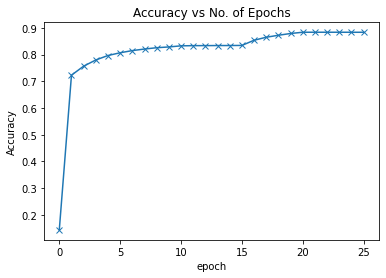

In [85]:
accuracies = [result["val_acc"] for result in history]
plt.plot(accuracies , "-x")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs No. of Epochs")

## Testing With Individual Images

In [86]:
test_dataset = MNIST(root= "/content/drive/MyDrive/Datasets", train = False ,transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


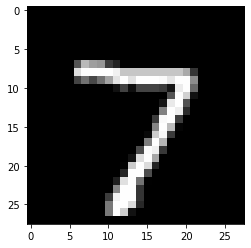

In [90]:
img , label = test_dataset[0]
plt.imshow(img[0] , cmap = "gray")
print("Shape:", img.shape)
print("Label:", label)

In [91]:
def predict_image(img , model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb , dim = 1)
  return preds[0].item()

Label: 7  ,  Predicted: 7


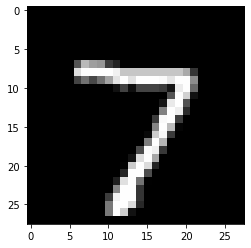

In [93]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = "gray")
print("Label:" , label , " ,  Predicted:", predict_image(img,model))

Label: 0  ,  Predicted: 0


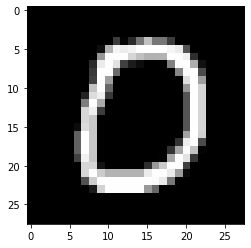

In [94]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap = "gray")
print("Label:" , label , " ,  Predicted:", predict_image(img,model))

Label: 9  ,  Predicted: 4


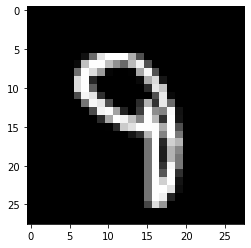

In [95]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap = "gray")
print("Label:" , label , " ,  Predicted:", predict_image(img,model))

Label: 2  ,  Predicted: 8


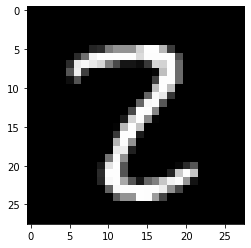

In [96]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap = "gray")
print("Label:" , label , " ,  Predicted:", predict_image(img,model))

Label: 5  ,  Predicted: 5


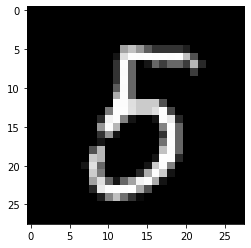

In [97]:
img, label = test_dataset[45]
plt.imshow(img[0], cmap = "gray")
print("Label:" , label , " ,  Predicted:", predict_image(img,model))

Label: 9  ,  Predicted: 9


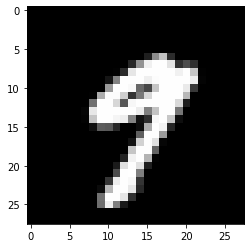

In [98]:
img, label = test_dataset[20]
plt.imshow(img[0], cmap = "gray")
print("Label:" , label , " ,  Predicted:", predict_image(img,model))

In [100]:
test_loader = DataLoader(test_dataset , batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8885742425918579, 'val_loss': 0.4405744671821594}

**End for today.**